## Introduction to SpaCy
SpaCy is one of the main libraries for NLP in Python. It is especially tailored towards the (development and) deployment of pipelines for a number of NLP tasks, from named entity recognition to dependency parsing. Recent additions to spaCy also make it possible to use advanced models (LLMs) as building block for such pipelines. 

In this notebook, we will explore some of SpaCy's basic functionality. As we will mainly focus on understanding and implementing methods to represent and generate text, we will not be using SpaCy extensively for the rest of the course -- but it is a great tool for many applications, and it has wonderful documentation.

Let's start by importing SpaCy.
You may need to install this first (I am using `spacy==3.6.1`) -- add it to your requirements file if you have one.

In [5]:
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
from collections import defaultdict
from sklearn.decomposition import PCA

When spaCy is loaded, we then need to initialize a model.

NB: Models first have to be downloaded from the command line. An overview of avaiable models from spaCy can be found [here](https://spacy.io/usage/models):
```
python -m spacy download en_core_web_md
```
Note that models for a wide range of languages are available on SpaCy, feel free to experiment!

In [7]:
nlp = spacy.load("en_core_web_md")

We first create a `spaCy` pipeline which is going to be used for all of our analysis. Essentially we feed our examples of language down the pipeline, and get annotated texts out the end. Let's load the first 10 chapters of "War and Peace", the text file we worked with last week.

In [8]:
#book = open('work/Spaghetti/NLP-AU-23/nbs/book-war-and-peace.txt/book-war-and-peace.txt').read()
book = open('book-war-and-peace.txt').read()

In [ ]:
print(book)

Let's now find where chapter 10 starts, and only keep text until there.

In [10]:
chap_10_index = re.search('CHAPTER X', book).start()
book = book[:chap_10_index]

The final object that comes out of the end is known as a `spaCy` `Doc` which is essentially a list of tokens. However, rather than just being a list of strings, each of the tokens in this list have their own attributes, which can be accessed using the dot notation.

In [11]:
doc = nlp(book)

The resulting `doc` parses the text in sentences and tokens within sentences.

In [12]:
for s in doc.sents:
    print(s)
    for t in s:
        print(t)

CHAPTER I

"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes.
CHAPTER
I



"
Well
,
Prince
,
so
Genoa
and
Lucca
are
now
just
family
estates
of
the


Buonapartes
.
But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by that
Antichrist--I really believe he is Antichrist--I will have nothing more
to do with you and you are no longer my friend, no longer my 'faithful
slave,' as you call yourself!
But
I
warn
you
,
if
you
do
n't
tell
me
that
this
means
war
,


if
you
still
try
to
defend
the
infamies
and
horrors
perpetrated
by
that


Antichrist
--
I
really
believe
he
is
Antichrist
--
I
will
have
nothing
more


to
do
with
you
and
you
are
no
longer
my
friend
,
no
longer
my
'
faithful


slave
,
'
as
you
call
yourself
!
But how do you do?
But
how
do
you
do
?
I see I have frightened
you--sit down and tell me all the news.
I
see
I
have
frightened


you
--
sit
down
and
tell
me
all
the
news
.
"

It wa

Each token in the doc is annotated for a number of attributes.

In [13]:
i = 0
for token in doc:
    i += 1
    print(token.text, "\t\t", token.pos_, "\t\t", token.dep_,"\t\t", token.lemma_, "\t\t")
    if i == 50:
        break

CHAPTER 		 PROPN 		 prep 		 CHAPTER 		
I 		 PRON 		 pobj 		 I 		


 		 SPACE 		 dep 		 

 		
" 		 PUNCT 		 punct 		 " 		
Well 		 INTJ 		 intj 		 well 		
, 		 PUNCT 		 punct 		 , 		
Prince 		 PROPN 		 appos 		 Prince 		
, 		 PUNCT 		 punct 		 , 		
so 		 ADV 		 advmod 		 so 		
Genoa 		 PROPN 		 nsubj 		 Genoa 		
and 		 CCONJ 		 cc 		 and 		
Lucca 		 PROPN 		 conj 		 Lucca 		
are 		 AUX 		 ROOT 		 be 		
now 		 ADV 		 advmod 		 now 		
just 		 ADV 		 advmod 		 just 		
family 		 NOUN 		 compound 		 family 		
estates 		 NOUN 		 attr 		 estate 		
of 		 ADP 		 prep 		 of 		
the 		 DET 		 det 		 the 		

 		 SPACE 		 dep 		 
 		
Buonapartes 		 PROPN 		 pobj 		 Buonapartes 		
. 		 PUNCT 		 punct 		 . 		
But 		 CCONJ 		 cc 		 but 		
I 		 PRON 		 nsubj 		 I 		
warn 		 VERB 		 ccomp 		 warn 		
you 		 PRON 		 dobj 		 you 		
, 		 PUNCT 		 punct 		 , 		
if 		 SCONJ 		 mark 		 if 		
you 		 PRON 		 nsubj 		 you 		
do 		 AUX 		 aux 		 do 		
n't 		 PART 		 neg 		 not 		
tell 		 VERB 		 advcl 		 tell 		
me 	

### Exploring named entities

Let's explore one of the features of spaCy: named entity recognition. These are all the named entities spaCy finds in the text.

In [14]:
doc.ents

(Prince,
 Genoa,
 Lucca,
 Buonapartes,
 Antichrist,
 July,
 1805,
 Anna Pavlovna
 Scherer,
 Empress,
 Marya Fedorovna,
 Prince Vasili Kuragin,
 first,
 Anna Pavlovna,
 some days,
 St. Petersburg,
 French,
 footman,
 morning,
 tonight,
 Scherer,
 French,
 Anna Pavlovna,
 First,
 Anna Pavlovna,
 English,
 Today,
 Wednesday,
 today,
 Novosiltsev,
 Buonaparte,
 Prince Vasili,
 Anna Pavlovna Scherer,
 forty years,
 Anna Pavlovna,
 Austria,
 Austria,
 Russia,
 Europe,
 one,
 one,
 England,
 Alexander,
 Malta,
 Novosiltsev,
 English,
 Prussia,
 Buonaparte,
 Europe,
 Hardenburg,
 Haugwitz,
 Prussian,
 Europe,
 Wintzingerode,
 Prussia,
 two,
 tonight,
 Vicomte de Mortemart,
 Rohans,
 one,
 French,
 the Abbe Morio,
 the Dowager Empress,
 first,
 Vienna,
 Prince Vasili,
 Marya Fedorovna,
 Anna Pavlovna,
 Empress,
 Funke,
 the Dowager Empress,
 Empress,
 Anna Pavlovna's,
 d'estime,
 Anna Pavlovna,
 Empress,
 two,
 Anatole,
 Two,
 Majesty,
 Hippolyte,
 Anatole,
 Anna Pavlovna,
 Anna Pavlovna,
 Anat

SpaCy also has some nice utils to visualize like named entities or dependency relations between individual words (try replace `ent` with `dep`). Let's see how this looks:

In [15]:
spacy.displacy.serve(doc[:300], style="ent")

/home/ucloud/.local/lib/python3.10/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [16]:
spacy.displacy.serve(doc[:300], style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Now let's try to look at the frequency of each entity, and see what information we can extract on the characters named in the book.

In [18]:
entity_counts = defaultdict(lambda: 0)
#defaultdict measn when you summon a key for an item that does not exist
#add it to the dictionary with key value 0
for e in doc.ents:
    if e.label_ == 'PERSON':
        entity_counts[e.text] += 1
#we created a dictionary that was used to count the number of people in the doc

In [19]:
import pandas as pd
#we converted the dictionary people counter into a sorted df through pandas
entity_df = pd.DataFrame.from_dict(entity_counts, 
                                   orient='index').reset_index()
#some cleaning is done, the df now has an index column, entity column, and count column.
entity_df = entity_df.rename({'index': 'entity', 0: 'count'}, axis=1).sort_values(by='count', ascending=False)

In [20]:
entity_df

,entity,count
29,Pierre,98
5,Anna Pavlovna,55
43,Prince Andrew,39
84,Dolokhov,26
36,Prince Hippolyte,16
...,...,...
73,Uncle,1
74,Prince Andrew\nslowly,1
78,comme il\nfaut,1
79,Vasili Kuragin's,1


/home/ucloud/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ucloud/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ucloud/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ucloud/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


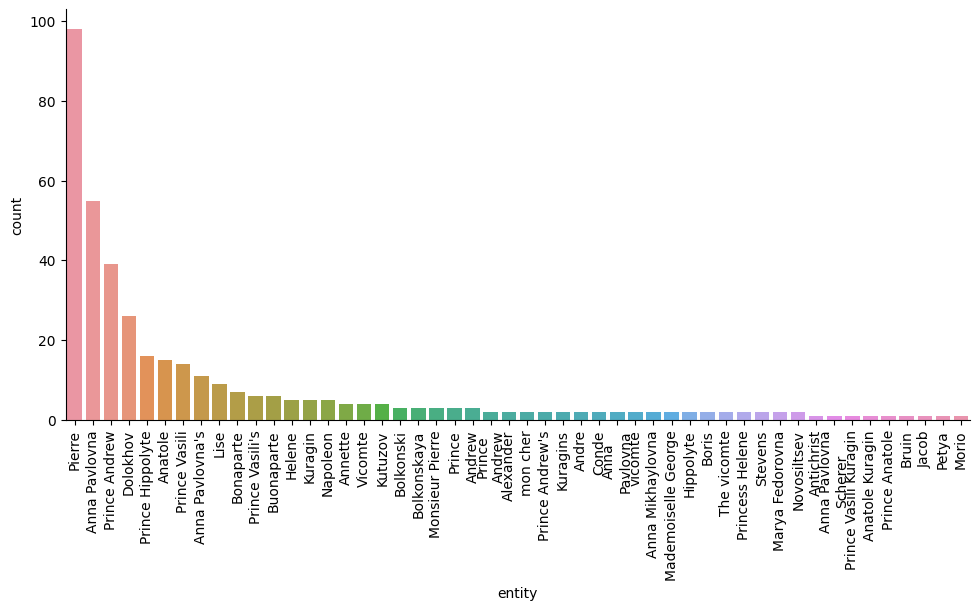

In [21]:
sns.catplot(data=entity_df.head(n=50), x='entity', y='count', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

We have a pretty accurate model of who they main characters in War and Peace are! You may notice that some entities are actually duplicates (`Anna Pavlovna` and `Anna Pavlovna's`: these could in principle be manually normalized or, more elegantly, clustered using pipelines for a task called "coreference resolution"). 

### Character time series
As a demonstration of what you can do with this, let's focus on the top 3 characters. Can we plot a time series, visualizing how many times they are mentioned in each of the 9 chapters?

In [ ]:
idxs = []
for t in doc:
    if t.text == 'CHAPTER':
        idxs.append(t.idx) # append start index of the chapter

In [ ]:
char_count_by_chapter = dict(zip(entity_df.entity.head(n=3).tolist(),
                                 [dict(zip(range(1,10),[0]*9)),
                                  dict(zip(range(1,10),[0]*9)),
                                  dict(zip(range(1,10),[0]*9))])) # there are more elegant ways to do this, with defaultdict

for e in doc.ents:
    if e.text in char_count_by_chapter.keys():
        for nr, i in enumerate(idxs):
            if e.start_char < i:
                char_count_by_chapter[e.text][nr] += 1 # is this correct?
                break
            else:
                if nr == 8:
                    char_count_by_chapter[e.text][9] += 1


In [ ]:
dfs = []
for k,v in char_count_by_chapter.items():
    df = pd.DataFrame.from_dict(v, orient='index').reset_index().rename({'index': 'chapter',
                                                                         0: 'count'}, axis=1)
    df['character'] = k
    dfs.append(df)
char_df = pd.concat(dfs)

In [ ]:
sns.lineplot(data=char_df, x='chapter', y='count', hue='character', marker='o')

## Word vectors
One of the attributes that spaCy models provide is easy access to word vectors. These are not based on counts, but on more sophisticated algorithms that we will look into in detail next week, but the intuition is the same as count-based vectors. Let's use this to put some of the notions we explored in our lecture into practice. First, let's take a look at some of the tokens in our text

In [ ]:
for i, t in enumerate(doc[:20]):
    print(i, t.text)

Let's focus on the token "family" (occurring, e.g., at index 15). We want to identify the words that are most similar to family (of those present in the text). With SpaCy, we can compute cosine similarity between vectors using in-build functionality. The following piece of code computes the similarity between "family" (the token at index 15) and "estates" (the token at index 16).

In [ ]:
doc[15].similarity(doc[16])

Based on this, can you identify the 20 tokens, of those occurring in our doc, whose vectors are *most similar* to "family"? Do the results make sense?

This looks very promising: can you do the same with other words? What happens if you look at the *most dissimilar* words?

Finally, let's visualize some vectors. Let's sample 200 random nouns, reduce the vector dimensionality with a technique called principal component analysis, and let's visualize the resulting space.

In [ ]:
random_indices = []
for i, t in enumerate(doc):
    if t.pos_ == 'NOUN':
        random_indices.append(i)
        if len(random_indices) == 200:
            break

In [ ]:
pca = PCA(n_components=2)
vectors = np.vstack([doc[i].vector for i in random_indices])
reduced_vectors = pca.fit_transform(vectors) # transform into a 2d space

In [ ]:
reduced_vectors

Now let's plot the reduced vectors in 2D space:

In [ ]:
plt.subplots(figsize=(20,20))
sns.scatterplot(x=reduced_vectors[:200,0], y=reduced_vectors[:200,1])
for i in range(200):
    plt.text(reduced_vectors[i,0], 
             reduced_vectors[i,1], 
             doc[random_indices[i]])

Do you notice anything promising in terms of relations between vectors?

Note that you can also use `scikit-learn` to compute `euclidean_distances` and `cosine_similarity`, see: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise. These functions require a matrix as input, and they compute all pairwise similarities between rows of the matrix.

**Optional**: can you implement your own versions functions to compute euclidean distance and cosine similarity? Look at the formulas from Lecture 2, and use `spaCy` or `scikit-learn` functions to check that they are correct. We will experiment more with word vectors next week.

## Task
In the shared data drive on UCloud, there is a folder called `data`, where you can find a file called `News_Category_Dataset_v2.json`. This is taken from [this Kaggle exercise](https://www.kaggle.com/datasets/rmisra/news-category-dataset) and comprises some 200k news headlines from [HuffPost](https://www.huffpost.com/). The data is a json lines format, with one JSON object per row. You can load this data into pandas in the following way:
```
data = pd.read_json(filepath, lines=True)
```
Select a couple of sub-categories of news data and use spaCy to find the relative frequency per **10k words** of each of the following word classes - NOUN, VERB, ADJECTIVE, ADVERB (in the headlines).
Save the results as a CSV file (again using pandas).
Are there any differences in the distributions?